# Fully Connected NN

In [2]:
# Import functions
import setGPU0
from io_functions import *
from draw_functions import *

Couldn't import dot_parser, loading of dot files will not be possible.
using

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)
Using Theano backend.


 gpu0


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## Load the gammas and pi0s as nparrays of 20x20x25 event arrays

In [3]:
# Get the datasets for the first time
#signal = get_dataset('/data/vlimant/LCD/Gamma100GeV')
#bkg = get_dataset('/data/vlimant/LCD/Pi0100GeV')

# Save the datasets for faster future loading
#save_dataset("/data/vlimant/LCD/Gamma100GeV", signal)
#save_dataset("/data/vlimant/LCD/Pi0100GeV", bkg)

In [4]:
# Load the datasets
#signal = load_dataset("/data/vlimant/LCD/Gamma100GeV")
#bkg = load_dataset("/data/vlimant/LCD/Pi0100GeV")

## Prepare the data

In [4]:
# 1 is signal; 0 is background
train_data, test_data, train_labels, test_labels = train_test(shape=(10000,), split=0.33)

## Create and train the model

In [8]:
# Construct and compile a network
model = Sequential()
model.add(Dense(10, input_dim=10000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')

In [121]:
# Train the network
my_fit = model.fit(train_data, train_labels, nb_epoch=10, batch_size=100, verbose=1)

Epoch 1/10
54236/54236 [==============================] - 2s - loss: 0.6801     
Epoch 2/10
54236/54236 [==============================] - 2s - loss: 0.6700     
Epoch 3/10
54236/54236 [==============================] - 2s - loss: 0.6582     
Epoch 4/10
54236/54236 [==============================] - 2s - loss: 0.6438     
Epoch 5/10
54236/54236 [==============================] - 2s - loss: 0.6313     
Epoch 6/10
54236/54236 [==============================] - 2s - loss: 0.6173     
Epoch 7/10
54236/54236 [==============================] - 2s - loss: 0.6036     
Epoch 8/10
54236/54236 [==============================] - 2s - loss: 0.5916     
Epoch 9/10
54236/54236 [==============================] - 2s - loss: 0.5792     
Epoch 10/10
54236/54236 [==============================] - 2s - loss: 0.5691     


## Create a model using the function api

In [153]:
from keras.models import Model
from keras.layers import Input, Dense
i = Input(shape=(10000,))
d = Dense(10, activation='sigmoid')(i)
dp = Dropout(0.5)(d)
o = Dense(1,activation='sigmoid')(dp)

In [154]:
m_model = Model(input=i, output=o)
m_model.compile(loss='binary_crossentropy', optimizer='sgd')
#m_model.summary()

In [155]:
m_model.fit(train_data, train_labels, nb_epoch=100, batch_size=100, verbose=1)

Epoch 1/100
54236/54236 [==============================] - 2s - loss: 0.6166     
Epoch 2/100
54236/54236 [==============================] - 1s - loss: 0.5240     
Epoch 3/100
54236/54236 [==============================] - 1s - loss: 0.4764     
Epoch 4/100
54236/54236 [==============================] - 1s - loss: 0.4538     
Epoch 5/100
54236/54236 [==============================] - 1s - loss: 0.4420     
Epoch 6/100
54236/54236 [==============================] - 1s - loss: 0.4344     
Epoch 7/100
54236/54236 [==============================] - 1s - loss: 0.4251     
Epoch 8/100
54236/54236 [==============================] - 1s - loss: 0.4182     
Epoch 9/100
54236/54236 [==============================] - 1s - loss: 0.4158     
Epoch 10/100
54236/54236 [==============================] - 1s - loss: 0.4123     
Epoch 11/100
54236/54236 [==============================] - 1s - loss: 0.4091     
Epoch 12/100
54236/54236 [==============================] - 1s - loss: 0.4077     
Epoch 13/100


In [19]:
# Construct and compile a network
bmodel = Sequential()
bmodel.add(Dense(30, input_dim=10000, activation='sigmoid'))
bmodel.add(Dropout(0.5))
bmodel.add(Dense(30, activation='sigmoid'))
bmodel.add(Dropout(0.5))
bmodel.add(Dense(1, init='uniform', activation='sigmoid'))
bmodel.compile(loss='binary_crossentropy', optimizer='sgd')

In [27]:
my_bfit = bmodel.fit(train_data, train_labels, nb_epoch=100, batch_size=100, verbose=1)

Epoch 1/100
54236/54236 [==============================] - 2s - loss: 0.3662     
Epoch 2/100
54236/54236 [==============================] - 2s - loss: 0.3597     
Epoch 3/100
54236/54236 [==============================] - 2s - loss: 0.3558     
Epoch 4/100
54236/54236 [==============================] - 2s - loss: 0.3521     
Epoch 5/100
54236/54236 [==============================] - 2s - loss: 0.3513     
Epoch 6/100
54236/54236 [==============================] - 2s - loss: 0.3478     
Epoch 7/100
54236/54236 [==============================] - 2s - loss: 0.3482     
Epoch 8/100
54236/54236 [==============================] - 2s - loss: 0.3421     
Epoch 9/100
54236/54236 [==============================] - 2s - loss: 0.3409     
Epoch 10/100
54236/54236 [==============================] - 2s - loss: 0.3367     
Epoch 11/100
54236/54236 [==============================] - 2s - loss: 0.3362     
Epoch 12/100
54236/54236 [==============================] - 2s - loss: 0.3347     
Epoch 13/100


## Visualize the classification

### Classification Histogram

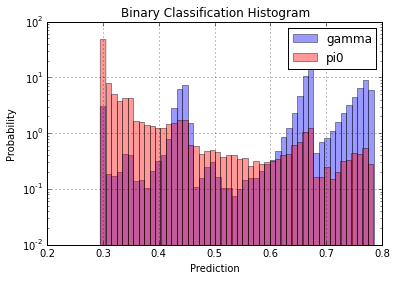

In [122]:
# Draw the classification histogram
draw_histogram(train_data, train_labels, model)

In [31]:
test_data.shape

(26714, 10000)

In [89]:
x=test_data.reshape((26714, 20,20,25))

In [90]:
layer_E = np.sum( x, axis=1)
layer_E.shape

(26714, 20, 25)

In [91]:
layer_E = np.sum( layer_E, axis=1)
layer_E.shape

(26714, 25)

In [98]:
ave_z = np.sum(layer_E*range(1,26), axis=1) / np.sum(layer_E,axis=1)

In [99]:
ave_z.shape

(26714,)

In [123]:
pred = model.predict( test_data )

In [47]:
pred.

(26714, 1)

In [52]:
peak = np.where( abs(pred-0.5)<0.01)

In [104]:
sel = np.where( test_labels==1)
selb = np.where( test_labels==0)

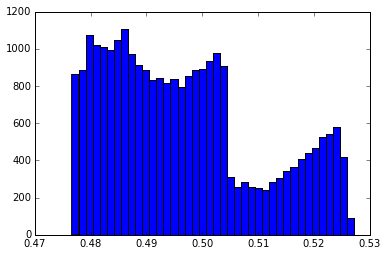

In [50]:
plt.hist( np.ravel(pred), bins=40)
plt.show()

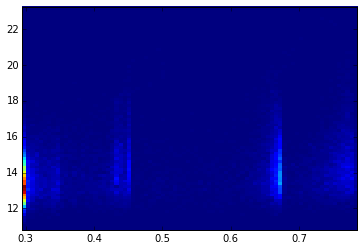

In [124]:
plt.hist2d( np.ravel(pred), ave_z, bins=80)
plt.show()

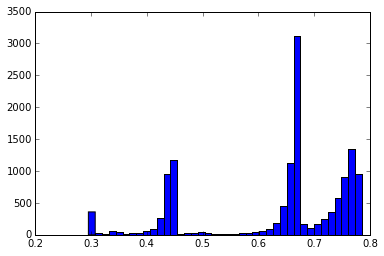

In [126]:
plt.hist( np.ravel(pred[sel]), bins=40)
plt.show()

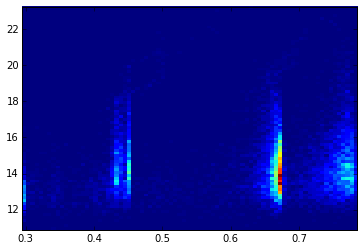

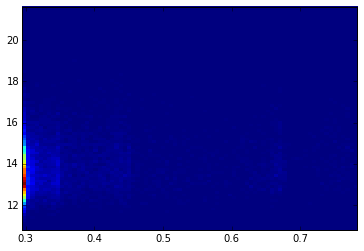

In [125]:
b,c,d,e = plt.hist2d( np.ravel(pred[sel]), ave_z[sel], bins=80)
plt.show()
plt.hist2d( np.ravel(pred[selb]), ave_z[selb], bins=80)
plt.show()

In [120]:
np.mean(b, axis=0).shape

(80,)

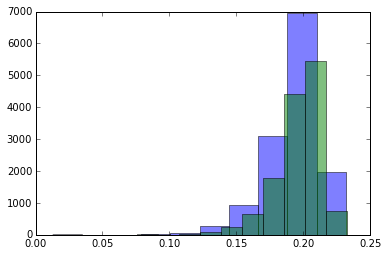

In [37]:
plt.hist( ave_z[np.where(test_labels==1)], label="1", alpha=0.5)
plt.hist( ave_z[np.where(test_labels==0)], label="0", alpha=0.5)

plt.show()

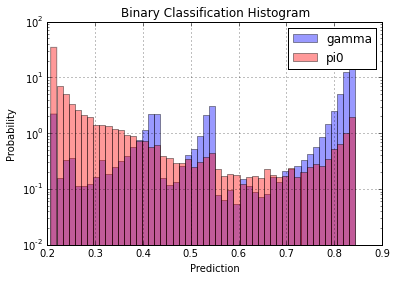

In [28]:
draw_histogram(test_data, test_labels, model)

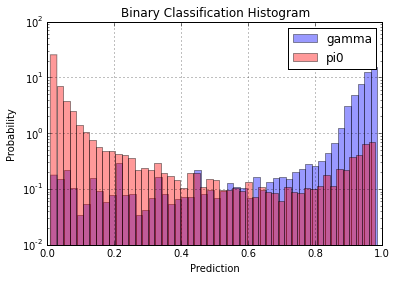

In [34]:
draw_histogram(test_data, test_labels, bmodel)

### ROC Curve

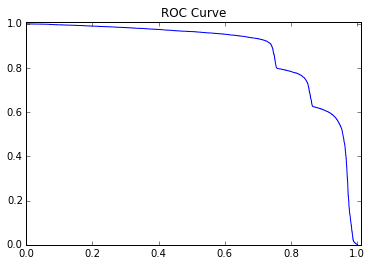

In [14]:
# Draw the roc curve
draw_roc_curve(test_data, test_labels, model)

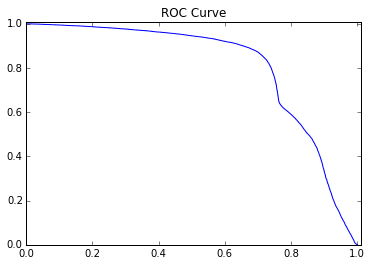

In [11]:
draw_roc_curve(train_data, train_labels, model)

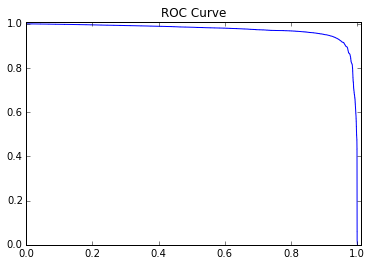

In [33]:
draw_roc_curve(train_data, train_labels, bmodel)

### Loss Evolution

In [32]:
bmodel.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_7 (Dense)                    (None, 30)          300030      dense_input_3[0][0]              
____________________________________________________________________________________________________
dropout_5 (Dropout)                (None, 30)          0           dense_7[0][0]                    
____________________________________________________________________________________________________
dense_8 (Dense)                    (None, 30)          930         dropout_5[0][0]                  
____________________________________________________________________________________________________
dropout_6 (Dropout)                (None, 30)          0           dense_8[0][0]                    
___________________________________________________________________________________________

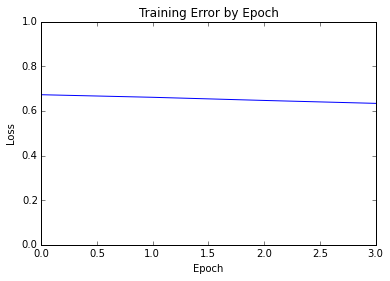

In [17]:
# Draw the loss history
draw_loss_history(my_fit)

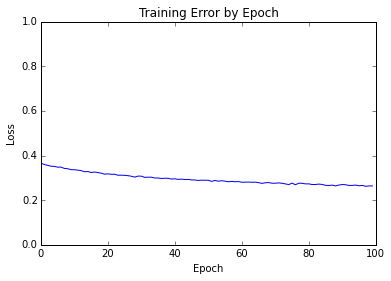

In [36]:
draw_loss_history(my_bfit)